# Final Assignment - AI and Applications M504A
#### Adolfo Mier y Teran Ruschke - GH1020379

### Introduction and context

I am a Data Science Consultant, hired by the world-renewed airline "Air Everywhere" to evaluate a customer satisfaction dataset provided by the company, which compiles survey data from more than 120,000 customers.

The main goal of the job is to answer the following BUSINESS QUESTIONS and gather insights relevant for the company:

1. What is the overall satisfaction for our customers?
2. What are the concepts that bring the most satisfaction to our customers?
3. What is the demographic (gender, age) behaviour according to customer satisfaction among the customers? Overall and per concept.
4. Which is the demographic group that is more satisfied and dissatisfied?
5. What are the flight characteristics distribution according to customer satisfaction among the customers? Overall and per concept.
6. Which flight characteristics define the highest customer satisfaction?
7. Which flight characteristics define the lowest customer satisfaction?



### Bibliography

The dataset used for this development can be found in Kaggle under the description: Airline Passenger Satisfaction, What factors lead to customer satisfaction for an Airline?

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download

No copyright infringement intended.

### Import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display 

### Load dataset

The company has provided us with a training and testing dataset, and for the purpose of this exercise I load load both of them and merge them into a single dataset.

In [22]:
#Load both datasets
original_train = pd.read_csv('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/python_coding/Final Assignment/train.csv')
original_test = pd.read_csv('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/python_coding/Final Assignment/test.csv')

#Concatenate them into a single dataset
flights_df = pd.concat([original_train, original_test], ignore_index=True)
flights_df = flights_df.rename(columns={'Unnamed: 0': 'index'})
flights_df = flights_df.set_index('index')
flights_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
index,,,,,,,,,,,,,,,,,,,,,
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Evaluate dataset at a glance

We use the description function to evaluate metrics of the dataset at a glance

In [23]:
#Check at a glance the available (numerical data)
flights_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.00,4.0,5.00,5.0


We can also check all the columns that are available in the dataset with the description of each concept

In [24]:
#Create a table with the description of each of the columns to understand better the data
list_columns = flights_df.columns.tolist()
list_concepts_columns = ['id',
                        'Gender of the passengers (Female, Male)',
                        'The customer type (Loyal customer, disloyal customer)',
                        'The actual age of the passengers',
                        'Purpose of the flight of the passengers (Personal Travel, Business Travel)',
                        'Travel class in the plane of the passengers (Business, Eco, Eco Plus)',
                        'The flight distance of this journey',
                        'Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)',
                        'Satisfaction level of Departure/Arrival time convenient',
                        'Satisfaction level of online booking',
                        'Satisfaction level of Gate location',
                        'Satisfaction level of Food and drink',
                        'Satisfaction level of online boarding',
                        'Satisfaction level of Seat comfort',
                        'Satisfaction level of inflight entertainment',
                        'Satisfaction level of On-board service',
                        'Satisfaction level of Leg room service',
                        'Satisfaction level of baggage handling',
                        'Satisfaction level of Check-in service',
                        'Satisfaction level of inflight service',
                        'Satisfaction level of Cleanliness',
                        'Minutes delayed when departure',
                        'Minutes delayed when Arrival',
                        'Airline satisfaction level(Satisfaction, neutral or dissatisfaction)']

list_concepts = pd.DataFrame({'columns': list_columns, 'concepts':list_concepts_columns}).set_index('columns')
#list_concepts

### 1. What is the overall satisfaction for our customers? 

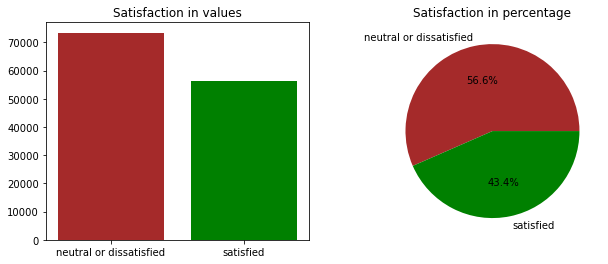

In [25]:
overall_satisfaction = pd.DataFrame(flights_df['satisfaction'].value_counts()).reset_index().rename(columns={'index':'classification'})

plt.figure(figsize=(16, 4))

plt.subplot(131)
plt.bar(overall_satisfaction['classification'], overall_satisfaction['satisfaction'], color=['brown', 'green'])
plt.title('Satisfaction in values')
plt.subplot(132)
plt.pie(overall_satisfaction['satisfaction'], labels=overall_satisfaction['classification'], autopct='%1.1f%%', colors=['brown', 'green'])
plt.title('Satisfaction in percentage')
plt.show()

There are 43.4% of satisfied customers, and 56.6% of dissatisfied or neutral customers

### 2. What are the concepts that bring the most satisfaction to our customers?

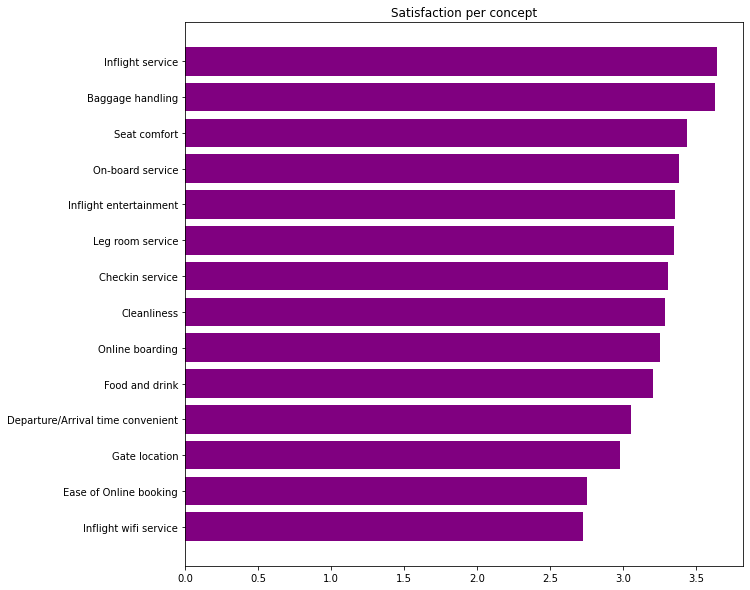

In [26]:
concept_satisfaction = pd.DataFrame(flights_df.describe())
concept_satisfaction = concept_satisfaction.drop(['id', 'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1).transpose().reset_index()
concept_satisfaction = concept_satisfaction[['index', 'mean']].sort_values(by='mean', ascending=True)

plt.figure(figsize=(10,10))
plt.barh(concept_satisfaction['index'], concept_satisfaction['mean'], color='purple')
plt.title('Satisfaction per concept')
plt.show()

From this chart we can identify the factors that contribute the most to overall customer satisfaction

### 3. What is the demographic (gender, age) behaviour according to customer satisfaction among the customers? Overall and per concept. 

<Figure size 792x648 with 0 Axes>

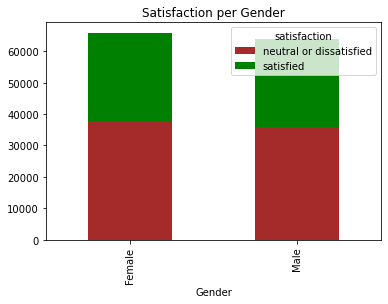

In [27]:
overall_gender_satisfaction = pd.crosstab(flights_df['Gender'], flights_df['satisfaction'])

plt.figure(figsize=(11, 9))
overall_gender_satisfaction.plot(kind='bar', stacked=True, color=['brown', 'green'])
plt.title('Satisfaction per Gender')
plt.show()

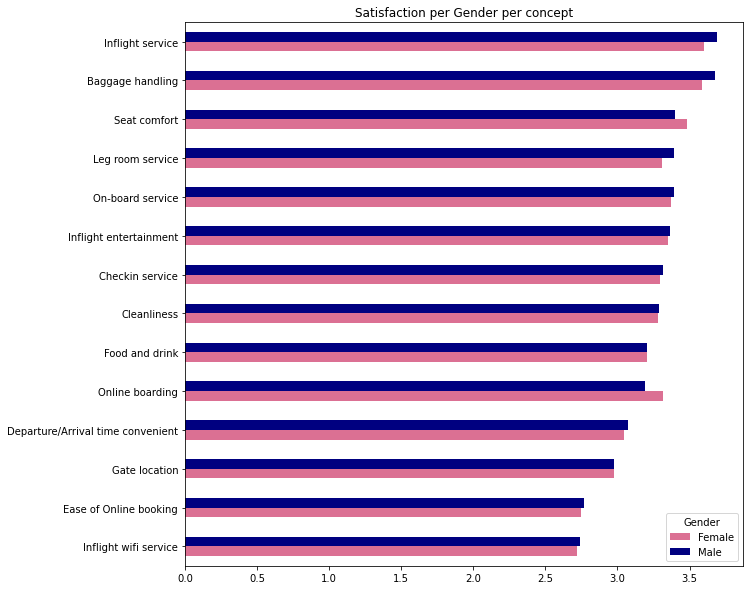

In [28]:
concept_gender_satisfaction = pd.DataFrame(flights_df.groupby('Gender')[['Inflight wifi service',
                                                                        'Departure/Arrival time convenient',
                                                                        'Ease of Online booking',
                                                                        'Gate location',
                                                                        'Food and drink',
                                                                        'Online boarding',
                                                                        'Seat comfort',
                                                                        'Inflight entertainment',
                                                                        'On-board service',
                                                                        'Leg room service',
                                                                        'Baggage handling',
                                                                        'Checkin service',
                                                                        'Inflight service',
                                                                        'Cleanliness']].mean()).transpose().sort_values(by='Male', ascending=True)

concept_gender_satisfaction.plot(kind='barh', color=['palevioletred', 'navy'], figsize=(10,10))
plt.title('Satisfaction per Gender per concept')
plt.show()

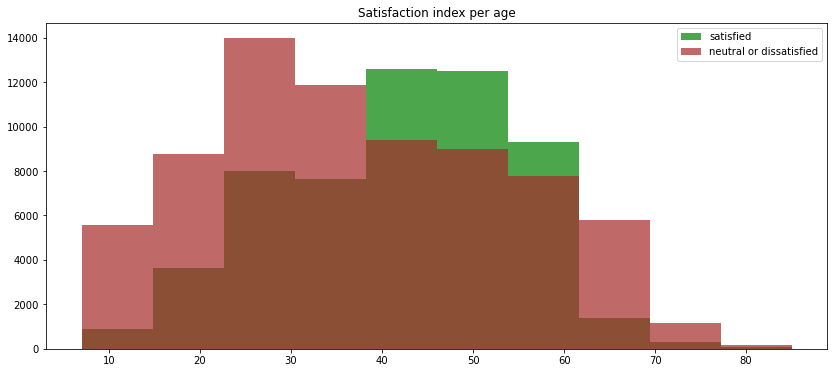

In [29]:
satisfaction_age = flights_df[flights_df['satisfaction'] == 'satisfied']
dissatisfaction_age = flights_df[flights_df['satisfaction'] == 'neutral or dissatisfied']

satisfaction_age['Age'].hist(bins=10, alpha = 0.7, color='green', figsize=(14,6), grid=False)
dissatisfaction_age['Age'].hist(bins = 10, alpha = 0.7, color = 'brown', figsize=(14,6), grid=False)
plt.legend(['satisfied', 'neutral or dissatisfied'])
plt.title('Satisfaction index per age')
plt.show()

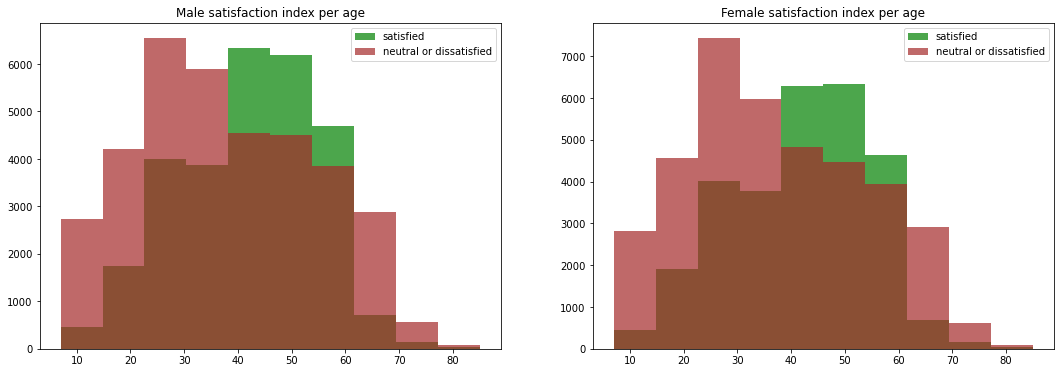

In [30]:
male_satisfaction_age = flights_df[(flights_df['satisfaction'] == 'satisfied') & (flights_df['Gender'] == 'Male')]
male_dissatisfaction_age = flights_df[(flights_df['satisfaction'] == 'neutral or dissatisfied') & (flights_df['Gender'] == 'Male')]

female_satisfaction_age = flights_df[(flights_df['satisfaction'] == 'satisfied') & (flights_df['Gender'] == 'Female')]
female_dissatisfaction_age = flights_df[(flights_df['satisfaction'] == 'neutral or dissatisfied') & (flights_df['Gender'] == 'Female')]

plt.subplot(141)
male_satisfaction_age['Age'].hist(bins=10, alpha = 0.7, color='green', figsize=(38,6), grid=False)
male_dissatisfaction_age['Age'].hist(bins = 10, alpha = 0.7, color = 'brown', figsize=(38,6), grid=False)
plt.legend(['satisfied', 'neutral or dissatisfied'])
plt.title('Male satisfaction index per age')

plt.subplot(142)
female_satisfaction_age['Age'].hist(bins=10, alpha = 0.7, color='green', figsize=(38,6), grid=False)
female_dissatisfaction_age['Age'].hist(bins = 10, alpha = 0.7, color = 'brown', figsize=(38,6), grid=False)
plt.legend(['satisfied', 'neutral or dissatisfied'])
plt.title('Female satisfaction index per age')

plt.show()

### 4. Which is the demographic group that is more satisfied and dissatisfied?

We can conclude from the previous charts that the demographic group that is more SATISFIED are the male and female users between 40 to 60 years old, and the most DISSATISFIED group are the male and female users between 20 to 30 years old. 

### 5. What are the flight characteristics distribution according to customer satisfaction among the customers? Overall and per concept.

Overal per Customer Type

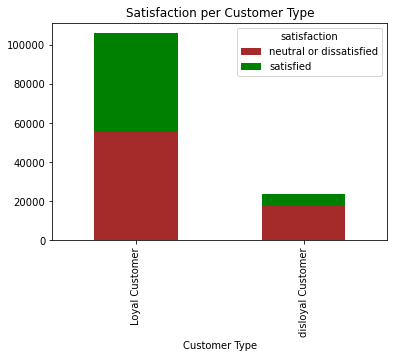

In [31]:
customer_type_overall = pd.crosstab(flights_df['Customer Type'], flights_df['satisfaction'])

customer_type_overall.plot(kind='bar', stacked=True, color=['brown', 'green'], figsize=(6,4))
plt.title('Satisfaction per Customer Type')
plt.show()

Satisfaction per concept for Customer Type

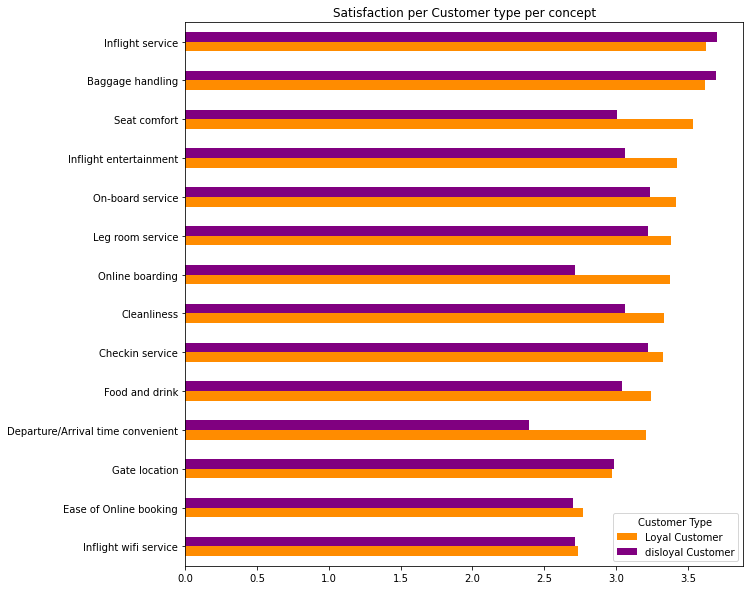

In [32]:
customer_type_satisfaction = pd.DataFrame(flights_df.groupby('Customer Type')[['Inflight wifi service',
                                                                        'Departure/Arrival time convenient',
                                                                        'Ease of Online booking',
                                                                        'Gate location',
                                                                        'Food and drink',
                                                                        'Online boarding',
                                                                        'Seat comfort',
                                                                        'Inflight entertainment',
                                                                        'On-board service',
                                                                        'Leg room service',
                                                                        'Baggage handling',
                                                                        'Checkin service',
                                                                        'Inflight service',
                                                                        'Cleanliness']].mean()).transpose().sort_values(by='Loyal Customer', ascending=True)

customer_type_satisfaction.plot(kind='barh', color=['darkorange', 'purple'], figsize=(10,10))
plt.title('Satisfaction per Customer type per concept')
plt.show()

Overall per Type of travel (Business travel, Personal Travel)

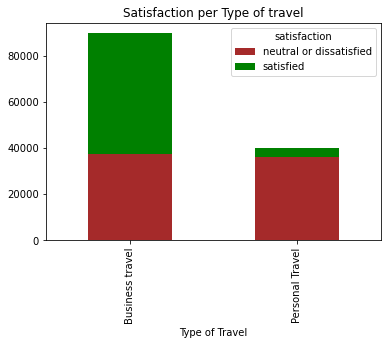

In [33]:
travel_type_overall = pd.crosstab(flights_df['Type of Travel'], flights_df['satisfaction'])

travel_type_overall.plot(kind='bar', stacked=True, color=['brown', 'green'], figsize=(6,4))
plt.title('Satisfaction per Type of travel')
plt.show()

Satisfaction per concept for type of travel

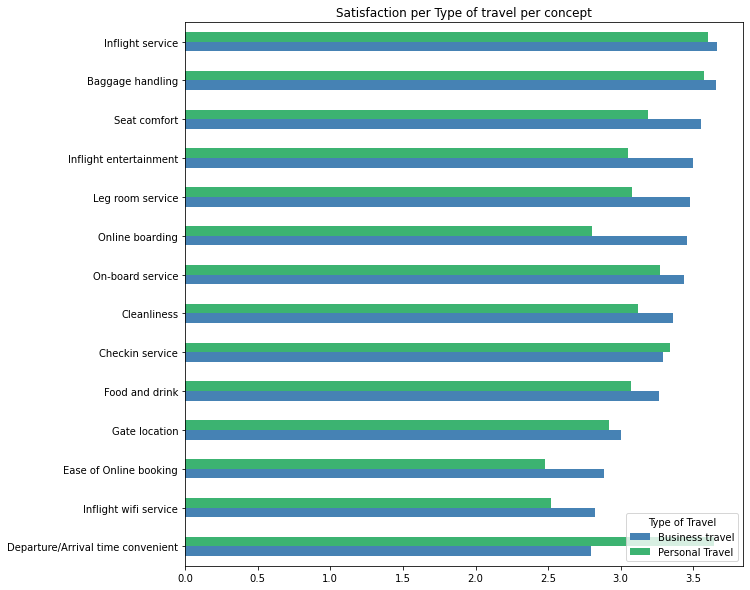

In [34]:
travel_type_satisfaction = pd.DataFrame(flights_df.groupby('Type of Travel')[['Inflight wifi service',
                                                                        'Departure/Arrival time convenient',
                                                                        'Ease of Online booking',
                                                                        'Gate location',
                                                                        'Food and drink',
                                                                        'Online boarding',
                                                                        'Seat comfort',
                                                                        'Inflight entertainment',
                                                                        'On-board service',
                                                                        'Leg room service',
                                                                        'Baggage handling',
                                                                        'Checkin service',
                                                                        'Inflight service',
                                                                        'Cleanliness']].mean()).transpose().sort_values(by='Business travel', ascending=True)

travel_type_satisfaction.plot(kind='barh', color=['steelblue', 'mediumseagreen'], figsize=(10,10))
plt.title('Satisfaction per Type of travel per concept')
plt.show()

Overall per Class

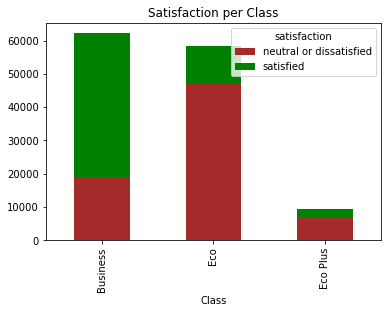

In [35]:
class_overall = pd.crosstab(flights_df['Class'], flights_df['satisfaction'])
#class_overall

class_overall.plot(kind='bar', stacked=True, color=['brown', 'green'], figsize=(6,4))
plt.title('Satisfaction per Class')
plt.show()

Satisfaction per customer per class

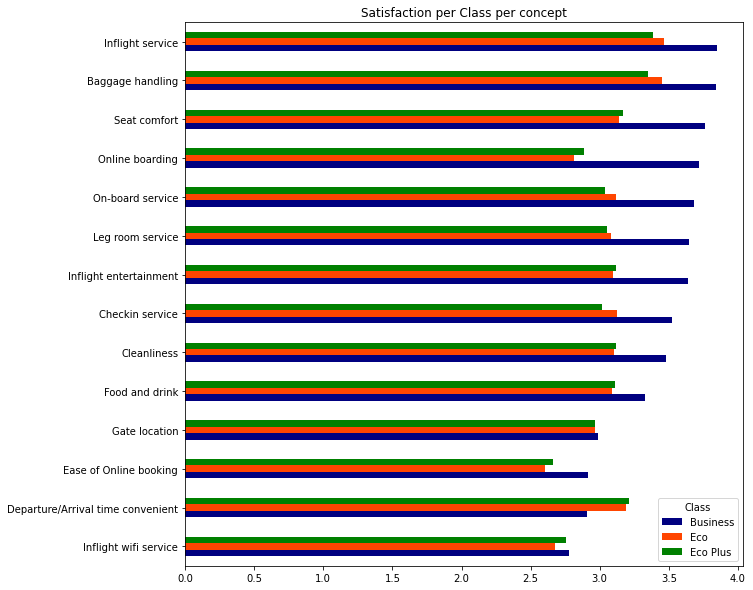

In [36]:
class_satisfaction = pd.DataFrame(flights_df.groupby('Class')[['Inflight wifi service',
                                                                        'Departure/Arrival time convenient',
                                                                        'Ease of Online booking',
                                                                        'Gate location',
                                                                        'Food and drink',
                                                                        'Online boarding',
                                                                        'Seat comfort',
                                                                        'Inflight entertainment',
                                                                        'On-board service',
                                                                        'Leg room service',
                                                                        'Baggage handling',
                                                                        'Checkin service',
                                                                        'Inflight service',
                                                                        'Cleanliness']].mean()).transpose().sort_values(by='Business', ascending=True)

class_satisfaction.plot(kind='barh', color=['navy', 'orangered', 'green'], figsize=(10,10))
plt.title('Satisfaction per Class per concept')
plt.show()

Analysis per flight distance

<AxesSubplot:>

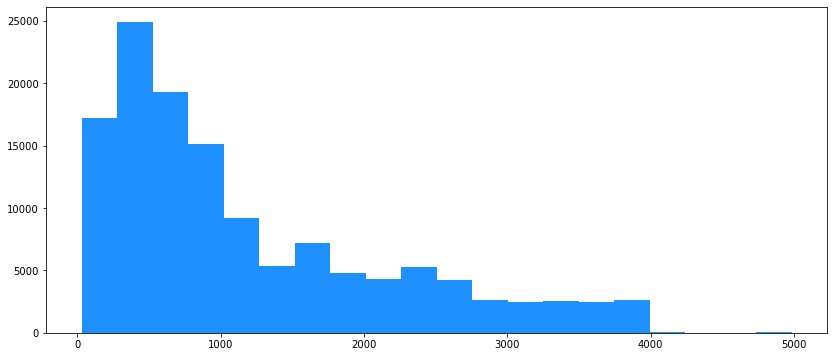

In [37]:
flights_df['Flight Distance'].hist(bins=20, color='dodgerblue', figsize=(14,6), grid=False)

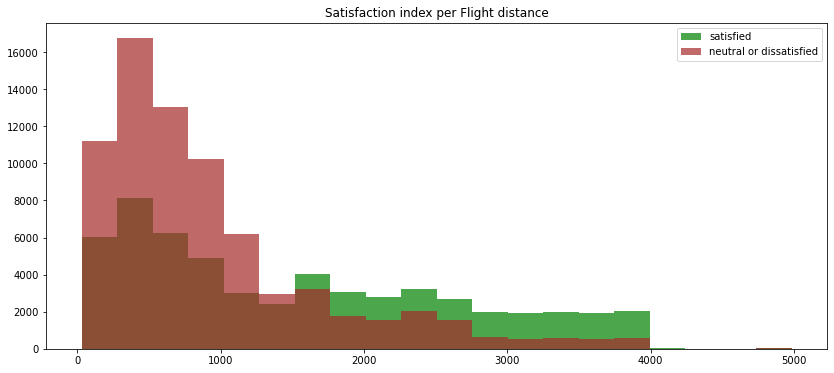

In [38]:
satisfaction_flight_distance = flights_df[flights_df['satisfaction'] == 'satisfied']
dissatisfaction_flight_distance = flights_df[flights_df['satisfaction'] == 'neutral or dissatisfied']

satisfaction_flight_distance['Flight Distance'].hist(bins=20, alpha = 0.7, color='green', figsize=(14,6), grid=False)
dissatisfaction_flight_distance['Flight Distance'].hist(bins = 20, alpha = 0.7, color = 'brown', figsize=(14,6), grid=False)
plt.legend(['satisfied', 'neutral or dissatisfied'])
plt.title('Satisfaction index per Flight distance')
plt.show()

### 6. Which flight characteristics define the highest customer satisfaction?

According to the analysis performed, the highest customer satisfaction for the type of flight comes from the following characteristics of customers:

- Loyal customers
- Travel for business
- Business Class

The 4 factors that provide the higher customer satisfaction are the Inflight Service, Baggage Handling, Seat Confort and Inflight Entretainment.

Also, flights with more than 1500 miles of distance are where the highest customer satisfaction is presented.

### 7. Which flight characteristics define the lowest customer satisfaction?

According to the analysis performed, the lowest customer satisfaction for the type of flight comes from the following characteristics of customers:

- Disloyal Customer
- Personal Travel
- Eco Class

The 4 factors that provide the lowest customer satisfaction are the Departure/Arrival Time Convenience, Ease of Online Booking, Inflight Entretainment and Online Boarding.

Also, flights with less than 1500 miles of distance tend to present the lowest customer satisfaction.

### Submission form

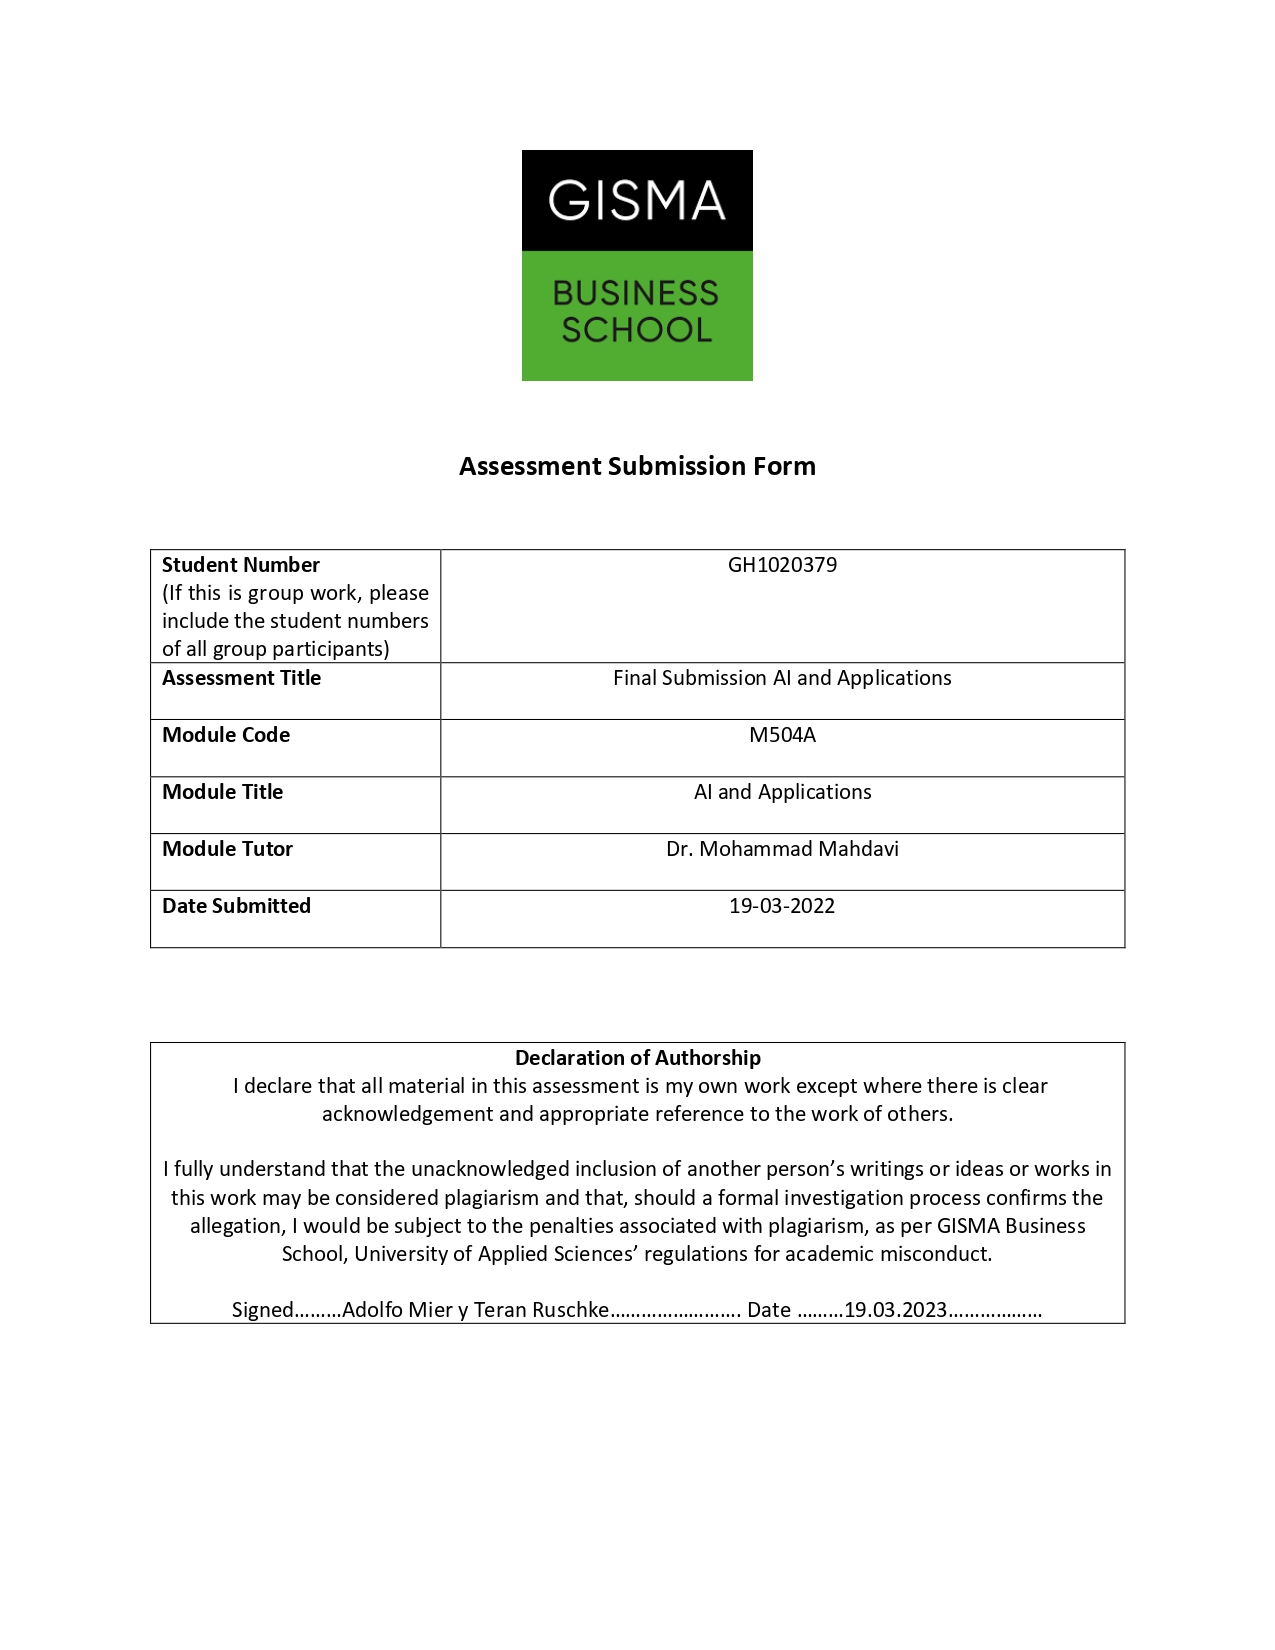

In [39]:
display.Image('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/python_coding/Final Assignment/Assessment Submission Form_InnMgmt_page-0001.jpg', width=500, height= 650)

In [40]:
!jupyter nbconvert --to html final_assignment_python.ipynb

[NbConvertApp] Converting notebook final_assignment_python.ipynb to html
[NbConvertApp] Writing 1389994 bytes to final_assignment_python.html
